### 背景：客户关系管理的关键问题是客户分类，通过客户分类，区分无价值客户、高价值客户。
### 目标：
* （1）借助数据，对客户进行分类。
* （2）对不同类别的客户进行特征分析，比较不同类客户的客户价值。

| 序号 | 属性名称                           | 说明                                                         |
| ---- | ---------------------------------- | ------------------------------------------------------------ |
| 1    | 会员卡号                           |                                                              |
| 2    | 入会时间                           | 办理会员卡的开始时间                                         |
| 3    | 第一次飞行日期                     |                                                              |
| 4    | 性别                               |                                                              |
| 5    | 会员卡级别                         |                                                              |
| 6    | 工作地城市                         |                                                              |
| 7    | 工作地所在省份                     |                                                              |
| 8    | 工作地所在国家                     |                                                              |
| 9    | 年龄                               |                                                              |
| 10   | 观测窗口的结束时间                 | 选取样本的时间宽度，距离现在最近的时间                       |
| 11   | 飞行次数                           | 频数                                                         |
| 12   | 观测窗口总基本积分                 | 航空公里的里程就相当于积分，积累一定分数可以兑换奖品和免费里程 |
| 13   | 第1年精英资格积分                  |                                                              |
| 14   | 第2年精英资格积分                  |                                                              |
| 15   | 第1年总票价                        |                                                              |
| 16   | 第2年总票价                        |                                                              |
| 17   | 观测窗口总飞行公里数               |                                                              |
| 18   | 观测窗口总加权飞行公里数           | $\sum(舱位折扣\times 航段距离)$                              |
| 19   | 末次飞行日期                       | 最后一次飞行时间                                             |
| 20   | 观测窗口季度平均飞行次数           |                                                              |
| 21   | 观测窗口季度平均基本积分累积       |                                                              |
| 22   | 观察窗口内第一次乘机时间至MAX时长  | 观察窗口时段，入会时长                                       |
| 23   | 最后一次乘机时间至观察窗口末端时长 |                                                              |
| 24   | 平均乘机时间间隔                   |                                                              |
| 25   | 观察窗口内最大乘机间隔             |                                                              |
| 26   | 观测窗口中第1年其他积分            | 合作伙伴、促销、外航转入等                                   |
| 27   | 观测窗口中第2年其他积分            | 合作伙伴、促销、外航转入等                                   |
| 28   | 积分兑换次数                       |                                                              |
| 29   | 平均折扣率                         |                                                              |
| 30   | 第1年乘机次数                      |                                                              |
| 31   | 第2年乘机次数                      |                                                              |
| 32   | 第1年里程积分                      |                                                              |
| 33   | 第2年里程积分                      |                                                              |
| 34   | 观测窗口总精英积分                 |                                                              |
| 35   | 观测窗口中其他积分                 | 合作伙伴、促销、外航转入等                                   |
| 36   | 非乘机积分总和                     |                                                              |
| 37   | 第2年非乘机积分总和                |                                                              |
| 38   | 总累计积分                         |                                                              |
| 39   | 第2年观测窗口总累计积分            |                                                              |
| 40   | 第2年乘机次数比率                  |                                                              |
| 41   | 第1年乘机次数比率                  |                                                              |
| 42   | 第1年里程积分占最近两年积分比例    |                                                              |
| 43   | 第2年里程积分占最近两年积分比例    |                                                              |
| 44   | 非乘机的积分变动次数               |                                                              |


### 方法：识别客户价值应用最广泛的模型是RFM模型。
* 最近消费时间间隔（Recency）
* 消费频率（Frenquency）
* 消费金额（Monetary）

### 模型修改：
由于航空公司票价受到飞行距离、舱位等级等多种因素影响，同样消费金额的不同旅客对航空公司的价值是不同的。因此单纯的RFM模型并不是适用航空客户价值分析。所以选择客户在一定时间内累积的飞行里程M和客户在一定时间内的平均折扣率C两个指标代替消费金额。另外再增加一个指标就是会员入会时间，这个指标在一定程度也会影响客户价值。

#### 最终指标：L：入会时间    R：最近乘坐航班     F：飞行次数    M：累积飞行里程     C：平均折扣率   （LRFMC模型）

In [ ]:
构造LRFMC指标：

L=LOAD_TIME - FFP_DATE(观测窗口的结束时间 - 入会时间)
R=LAST_TO_END(最后一次乘坐飞机距观测窗口结束的时长)
F=FLIGHT_COUNT(观测窗口内的飞行次数)
M=SEG_KM_SUM(观测窗口内的总飞行里程)
C=AVG_DISCOUNT(平均折扣率)

# 一、数据探索分析

In [ ]:
# 通过观察发现原始数据中存在票价为空，票价最小值为0，折扣率最小值为0、总飞行记录大于0的记录。
# 票价为空可能是客户不存在乘机记录，其他数据可能是客户乘坐0折机票，可将这些数据删掉。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 返回缺失值个数以及最大最小值
datafile= 'air_data.csv' 
data = pd.read_csv(datafile, encoding = 'utf-8') #读取原始数据，指定UTF-8编码。
data.shape

(62988, 44)

In [3]:
data.shape

(62988, 44)

In [4]:
# 对数据的描述，探索性分析
explore = data.describe().T # T是转置，转置后更方便查阅。
explore

,count,mean,std,min,25%,50%,75%,max
MEMBER_NO,62988.0,31494.500000,18183.213715,1.00,15747.750000,31494.500000,47241.250000,62988.000000
FFP_TIER,62988.0,4.102162,0.373856,4.00,4.000000,4.000000,4.000000,6.000000
AGE,62568.0,42.476346,9.885915,6.00,35.000000,41.000000,48.000000,110.000000
FLIGHT_COUNT,62988.0,11.839414,14.049471,2.00,3.000000,7.000000,15.000000,213.000000
BP_SUM,62988.0,10925.081254,16339.486151,0.00,2518.000000,5700.000000,12831.000000,505308.000000
EP_SUM_YR_1,62988.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
EP_SUM_YR_2,62988.0,265.689623,1645.702854,0.00,0.000000,0.000000,0.000000,74460.000000
SUM_YR_1,62437.0,5355.376064,8109.450147,0.00,1003.000000,2800.000000,6574.000000,239560.000000
SUM_YR_2,62850.0,5604.026014,8703.364247,0.00,780.000000,2773.000000,6845.750000,234188.000000
SEG_KM_SUM,62988.0,17123.878691,20960.844623,368.00,4747.000000,9994.000000,21271.250000,580717.000000


In [5]:
explore['null'] = len(data)-explore['count'] # describe()函数自动计算非空值数，需要手动计算空值数
explore = explore[['null', 'max', 'min']]
explore.columns = ['空值数', '最大值', '最小值'] # 表头重命名
explore

,空值数,最大值,最小值
MEMBER_NO,0.0,62988.000000,1.00
FFP_TIER,0.0,6.000000,4.00
AGE,420.0,110.000000,6.00
FLIGHT_COUNT,0.0,213.000000,2.00
BP_SUM,0.0,505308.000000,0.00
EP_SUM_YR_1,0.0,0.000000,0.00
EP_SUM_YR_2,0.0,74460.000000,0.00
SUM_YR_1,551.0,239560.000000,0.00
SUM_YR_2,138.0,234188.000000,0.00
SEG_KM_SUM,0.0,580717.000000,368.00


# 二、数据预处理

In [6]:
# 过滤：
#（1）票价为空的记录
#（2）票价为0、平均折扣率不为0、总飞行距离大于0的记录 （可能是积分兑换）

## （1）数据清洗

In [7]:
# 数据清洗，过滤掉不符合规则的数据
# 过滤掉票价为空的记录
data = data[data['SUM_YR_1'].notnull()*data['SUM_YR_2'].notnull()] # 保留票价非空值 【SUM_YR_1和SUM_YR_2分别表示第一年、第二年总票价】

/Users/mac/anaconda3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


In [8]:
# 只保留票价非零的，或者平均折扣率与总飞行公里数同时为0的记录。
index1 = data['SUM_YR_1'] != 0
index2 = data['SUM_YR_2'] != 0
index3 = (data['SEG_KM_SUM'] == 0) & (data['avg_discount'] == 0) # 逻辑与
data = data[index1 | index2 | index3] # 逻辑或
data.shape
# 过滤掉944条记录

(62044, 44)

## （2）属性约束

In [9]:
# LOAD_TIME：数据截取时间（观察期的结束时间，这里为2014-2-31）
# FFP_DATE：入会时间   —— L
# LAST_TO_END：最后一次乘机时间   —— R
# FLIGHT_COUNT：飞行次数  —— F
# SEG_KM_SUM：飞行总里程  —— M
# avg_discount ：平均折扣率 —— C

data = data[['LOAD_TIME','FFP_DATE','LAST_TO_END','FLIGHT_COUNT','SEG_KM_SUM','avg_discount']]
data.head(20)

,LOAD_TIME,FFP_DATE,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount
0,2014/03/31,2006/11/02,1,210,580717,0.961639
1,2014/03/31,2007/02/19,7,140,293678,1.252314
2,2014/03/31,2007/02/01,11,135,283712,1.254676
3,2014/03/31,2008/08/22,97,23,281336,1.090870
4,2014/03/31,2009/04/10,5,152,309928,0.970658
5,2014/03/31,2008/02/10,79,92,294585,0.967692
6,2014/03/31,2006/03/22,1,101,287042,0.965347
7,2014/03/31,2010/04/09,3,73,287230,0.962070
8,2014/03/31,2011/06/07,6,56,321489,0.828478
9,2014/03/31,2010/07/05,15,64,375074,0.708010


## （3）数据变换

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62044 entries, 0 to 62978
Data columns (total 6 columns):
LOAD_TIME       62044 non-null object
FFP_DATE        62044 non-null object
LAST_TO_END     62044 non-null int64
FLIGHT_COUNT    62044 non-null int64
SEG_KM_SUM      62044 non-null int64
avg_discount    62044 non-null float64
dtypes: float64(1), int64(3), object(2)
memory usage: 3.3+ MB


In [12]:
L = (pd.to_datetime(data['LOAD_TIME'])-pd.to_datetime(data['FFP_DATE'])).dt.days # 注意类型转换
L.head()

0    2706
1    2597
2    2615
3    2047
4    1816
dtype: int64

In [13]:
data['L'] = L
data['R'] = data['LAST_TO_END']
data['F'] = data['FLIGHT_COUNT']
data['M'] = data['SEG_KM_SUM']
data['C'] = data['avg_discount']
data1 = data[['L','R','F','M','C']]
data1.head()

,L,R,F,M,C
0,2706,1,210,580717,0.961639
1,2597,7,140,293678,1.252314
2,2615,11,135,283712,1.254676
3,2047,97,23,281336,1.090870
4,1816,5,152,309928,0.970658


In [14]:
explore1 = data1.describe().T
explore1 = explore1[['max','min']].T
explore1

# 5个指标的取值范围数据差异较大，为了消除数量级数据带来的影响，对数据进行标准化处理。

,L,R,F,M,C
max,3437.0,731.0,213.0,580717.0,1.500000
min,365.0,1.0,2.0,368.0,0.136017


In [15]:
# 标准差标准化
data_sta = (data1 - data1.mean(axis = 0))/(data1.std(axis = 0)) # 处理后的数据均值为0，标准差为1.
data_sta.columns=['Z'+i for i in data_sta.columns] # 表头重命名。
data_sta.head()

,ZL,ZR,ZF,ZM,ZC
0,1.435707,-0.944948,14.034016,26.761154,1.295540
1,1.307152,-0.911894,9.073213,13.126864,2.868176
2,1.328381,-0.889859,8.718869,12.653481,2.880950
3,0.658476,-0.416098,0.781585,12.540622,1.994714
4,0.386032,-0.922912,9.923636,13.898736,1.344335


# 三、模型构建

### 主要是两个部分：
* 利用K-means算法对客户进行聚类。
* 结合业务，分析客户特征，分析客户价值。

## （1）客户聚类

In [16]:
from sklearn.cluster import KMeans # 导入K均值聚类算法
def distEclud(vecA, vecB):
    """
    计算两个向量的欧式距离的平方，并返回
    """
    return np.sum(np.power(vecA - vecB, 2))
def test_Kmeans_nclusters(data_train):
    """
    计算不同的k值时，SSE的大小变化
    """
    data_train = data_train.values
    nums = range(2, 10)
    SSE = []
    for num in nums:
        sse = 0
        kmodel = KMeans(n_clusters=num, n_jobs=4)
        kmodel.fit(data_train)
        # 簇中心
        cluster_ceter_list = kmodel.cluster_centers_
        # 个样本属于的簇序号列表
        cluster_list = kmodel.labels_.tolist()
        for index in range(len(data)):
            cluster_num = cluster_list[index]
            sse += distEclud(data_train[index, :], cluster_ceter_list[cluster_num])
        print("簇数是", num, "时； SSE是", sse)
        SSE.append(sse)
    return nums, SSE
nums, SSE = test_Kmeans_nclusters(data_sta)

簇数是 2 时； SSE是 229344.90680960545
簇数是 3 时； SSE是 184343.83505412584
簇数是 4 时； SSE是 151010.72857574566
簇数是 5 时； SSE是 133360.13907802055
簇数是 6 时； SSE是 118067.14418195405
簇数是 7 时； SSE是 107633.37704238476
簇数是 8 时； SSE是 100707.41564168432
簇数是 9 时； SSE是 93872.33064772809


/Users/mac/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


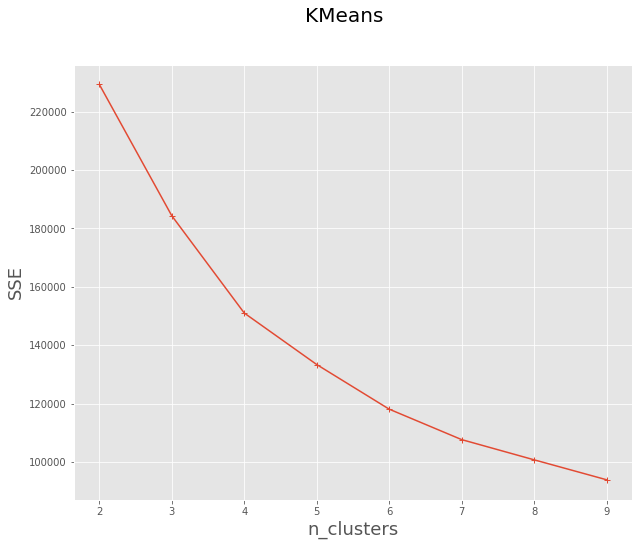

In [17]:
# 中文和负号的正常显示
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['font.size'] = 12.0
plt.rcParams['axes.unicode_minus'] = False
# 使用ggplot的绘图风格
plt.style.use('ggplot')
## 绘图观测SSE与簇个数的关系
fig=plt.figure(figsize=(10, 8))
ax=fig.add_subplot(1,1,1)
ax.plot(nums,SSE,marker="+")
ax.set_xlabel("n_clusters", fontsize=18)
ax.set_ylabel("SSE", fontsize=18)
fig.suptitle("KMeans", fontsize=20)
plt.show()

In [18]:
# 调用k-means算法，进行聚类分析
kmodel = KMeans(n_clusters = 5)
kmodel.fit(data_sta) #训练模型
kmodel.cluster_centers_ #查看聚类中心
kmodel.labels_ #查看各样本对应的类别


array([2, 2, 2, ..., 4, 3, 3], dtype=int32)

In [19]:
r1 = pd.Series(kmodel.labels_).value_counts() # 统计频数
r2 = pd.DataFrame(kmodel.cluster_centers_) # 聚类中心
r = pd.concat([r2,r1],axis=1)
r.columns = list(data_sta.columns) + ['聚类个数']
r

,ZL,ZR,ZF,ZM,ZC,聚类个数
0,0.052212,-0.002520,-0.226631,-0.231146,2.193325,4179
1,1.160572,-0.377240,-0.086948,-0.094866,-0.155762,15741
2,0.483328,-0.799383,2.483202,2.424724,0.308630,5336
3,-0.313572,1.686225,-0.573974,-0.536803,-0.173069,12125
4,-0.700199,-0.414924,-0.161168,-0.160968,-0.254906,24663


## （2）客户价值分析

In [20]:
r

,ZL,ZR,ZF,ZM,ZC,聚类个数
0,0.052212,-0.002520,-0.226631,-0.231146,2.193325,4179
1,1.160572,-0.377240,-0.086948,-0.094866,-0.155762,15741
2,0.483328,-0.799383,2.483202,2.424724,0.308630,5336
3,-0.313572,1.686225,-0.573974,-0.536803,-0.173069,12125
4,-0.700199,-0.414924,-0.161168,-0.160968,-0.254906,24663


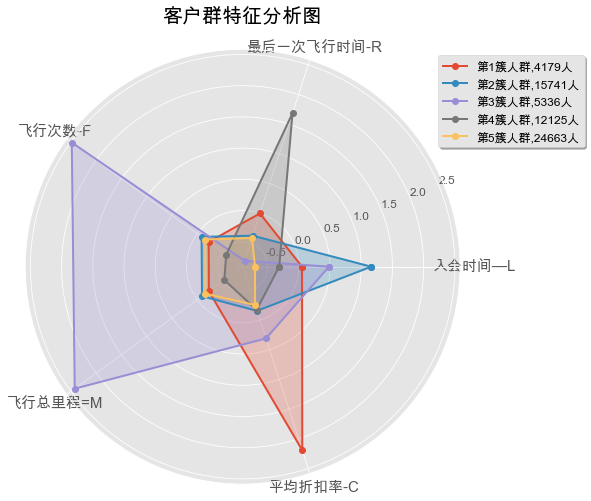

In [22]:
#plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['font.family']='Arial Unicode MS'
plt.rcParams['font.size'] = 12.0
plt.rcParams['axes.unicode_minus'] = False

r1 = pd.Series(kmodel.labels_).value_counts()  # 统计各个类别的数目
r2 = pd.DataFrame(kmodel.cluster_centers_)  # 找出聚类中心
# 所有簇中心坐标值中最大值和最小值
max = r2.values.max()
min = r2.values.min()
r = pd.concat([r2, r1], axis=1)  # 横向连接（0是纵向），得到聚类中心对应的类别下的数目
r.columns = list(data_sta.columns) + [u'类别数目']  # 重命名表头

# 绘图
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, polar=True)
center_num = r.values
feature = ["入会时间—L", '最后一次飞行时间-R',"飞行次数-F", "飞行总里程=M", "平均折扣率-C"]
N = len(feature)
for i, v in enumerate(center_num):
    # 设置雷达图的角度，用于平分切开一个圆面
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False)
    # 为了使雷达图一圈封闭起来，需要下面的步骤
    center = np.concatenate((v[:-1], [v[0]]))
    angles = np.concatenate((angles, [angles[0]]))
    # 绘制折线图
    ax.plot(angles, center, 'o-', linewidth=2, label="第%d簇人群,%d人" % (i + 1, v[-1]))
    # 填充颜色
    ax.fill(angles, center, alpha=0.25)
    # 添加每个特征的标签
    ax.set_thetagrids(angles * 180 / np.pi, feature, fontsize=15)
    # 设置雷达图的范围
    ax.set_ylim(min - 0.1, max + 0.1)
    # 添加标题
    plt.title('客户群特征分析图', fontsize=20)
    # 添加网格线
    ax.grid(True)
    # 设置图例
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0), ncol=1, fancybox=True, shadow=True)
    # bbox 指定图例在轴的位置  ncol 设置图例分为n列展示 fancybox 控制是否应在构成图例背景的FancyBboxPatch周围启用圆边

# 显示图形
plt.show()


| 客户类型     | 最近一次交易距离观测窗口的天数（黏性） | 累计交易频次（忠诚度） | 累计交易成交额（消费能力） | 对应场景                                         |
| ------------ | -------------------------------------- | ---------------------- | -------------------------- | ------------------------------------------------ |
| 重要价值客户 | +                                      | +                      | +                          | RFM都很大，优质客户                              |
| 重要召回客户 | -                                      | +                      | +                          | 成交量和成交额都很大，但是最近没有交易，需要召回 |
| 重要发展客户 | +                                      | -                      | +                          | 成交额大，最近有交易，需要重点识别               |
| 重要挽留客户 | -                                      | -                      | +                          | 成交额大，潜在的价值客户，需要挽留               |
| 潜力客户     | +                                      | +                      | -                          | 成交量大，且最近有交易，需要挖掘                 |
| 新客户       | +                                      | -                      | -                          | 最近有交易，是新客户，需要推广                   |
| 一般维持客户 | -                                      | +                      | -                          | 成交量大，但是贡献不大，黏性也不高，一般维持     |
| 流失客户     | -                                      | -                      | -                          | 已经流失的客户                                   |


